In [29]:
import numpy as np

data = np.loadtxt("em_data.txt")

np.random.seed(1905072)
lambda1 = np.random.uniform(1, 5)
lambda2 = np.random.uniform(5, 10)
w1 = 0.5 
w2 = 1 - w1

n = len(data)

In [30]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

max_iter = 100
tolerance = 1e-6
log_likelihood_old = -np.inf
log_likelihood_history = []

for iteration in range(max_iter):
    poisson1 = (lambda1**data) * np.exp(-lambda1) / factorial(data)
    poisson2 = (lambda2**data) * np.exp(-lambda2) / factorial(data)
    
    weighted_prob1 = w1 * poisson1
    weighted_prob2 = w2 * poisson2
    total_prob = weighted_prob1 + weighted_prob2
    
    log_likelihood_new = np.sum(np.log(total_prob))
    log_likelihood_history.append(log_likelihood_new)
    
    resp1 = weighted_prob1 / total_prob
    resp2 = weighted_prob2 / total_prob
    
    n1 = np.sum(resp1)
    n2 = np.sum(resp2)

    lambda1_new = np.sum(resp1 * data) / n1
    lambda2_new = np.sum(resp2 * data) / n2
    
    w1_new = n1 / n 
    w2_new = n2 / n
    
    if np.abs(log_likelihood_new - log_likelihood_old) < tolerance:
        print(f"Converged after {iteration+1} iterations.")
        break
        
    lambda1, lambda2 = lambda1_new, lambda2_new
    w1, w2 = w1_new, w2_new
    log_likelihood_old = log_likelihood_new


if lambda1 > lambda2:
    lambda1, lambda2 = lambda2, lambda1
    w1, w2 = w2, w1
    
# Output the results
print(f"Mean number of children in families with family planning: {lambda1:.2f}")
print(f"Mean number of children in families without family planning: {lambda2:.2f}")
print(f"Proportion of families with family planning: {w1:.2f}")
print(f"Proportion of families without family planning: {w2:.2f}")

Mean number of children in families with family planning: 1.78
Mean number of children in families without family planning: 4.91
Proportion of families with family planning: 0.36
Proportion of families without family planning: 0.64


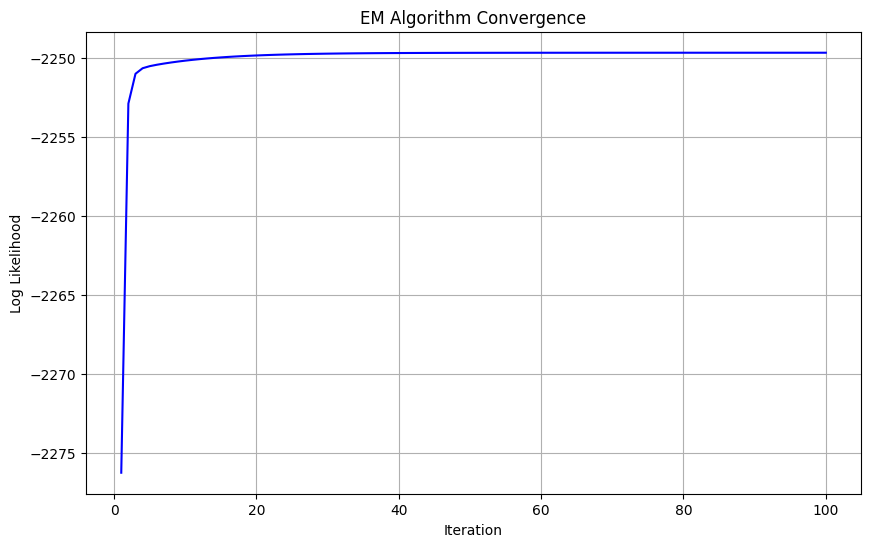

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(log_likelihood_history) + 1), log_likelihood_history, 'b-')
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.title('EM Algorithm Convergence')
plt.grid(True)
plt.show()

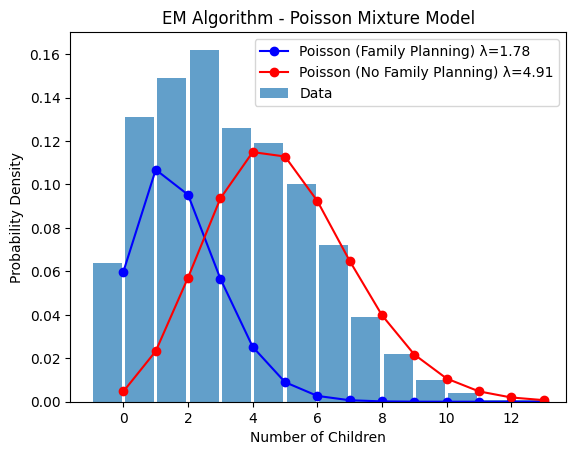

In [32]:
import matplotlib.pyplot as plt
from scipy.special import factorial

bins = np.arange(np.min(data), np.max(data) + 2) - 0.5 
hist, bin_edges = np.histogram(data, bins=bins, density=True)

plt.bar(bin_edges[:-1], hist, width=0.9, alpha=0.7, align='center', label='Data')

x = np.arange(np.min(data), np.max(data) + 1)

y1 = w1 * ((lambda1 ** x) * np.exp(-lambda1) / factorial(x))
y2 = w2 * ((lambda2 ** x) * np.exp(-lambda2) / factorial(x))

plt.plot(x, y1, 'o-', label=f'Poisson (Family Planning) λ={lambda1:.2f}', color='blue')
plt.plot(x, y2, 'o-', label=f'Poisson (No Family Planning) λ={lambda2:.2f}', color='red')

plt.legend()
plt.title("EM Algorithm - Poisson Mixture Model")
plt.xlabel("Number of Children")
plt.ylabel("Probability Density")
plt.show()
